<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/BGD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

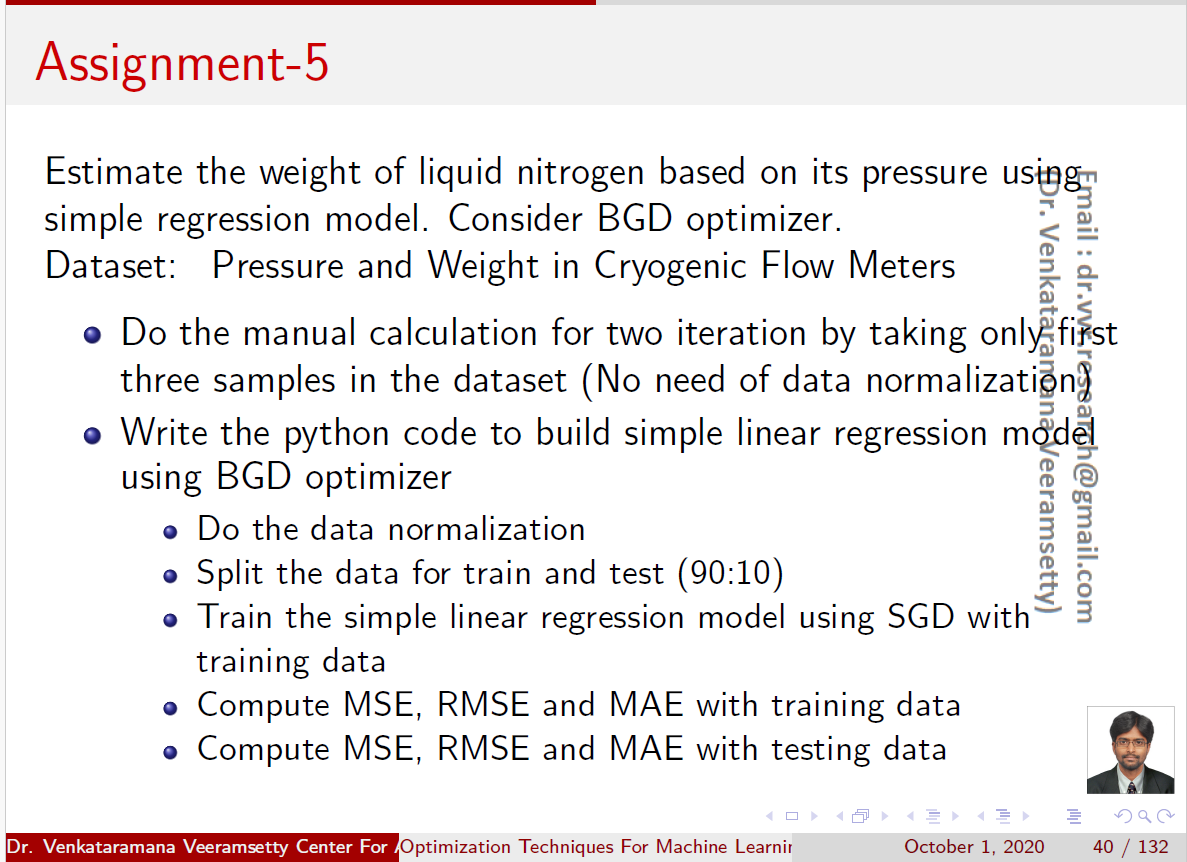

***Import Libraries***

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [2]:
data = pd.read_csv('/content/BGD-Assignment-Data-PreWeigNitrogen.csv')
data.head()

,Pressure,Weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


**Min Max Values**

In [3]:
Pressure_min=data['Pressure'].min()
Pressure_max=data['Pressure'].max()
Weight_min=data['Weight'].min()
Weight_max=data['Weight'].max()

**Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

**Covert 2D array Into Dataframe**

In [5]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['Pressure','Weight'])
data_norm.head()

,Pressure,Weight
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


**Data Split**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.Pressure, data_norm.Weight, test_size = 0.10, random_state = 10)

***Initilization of Model Parameters***

In [8]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000

***Gradient Computation***

In [9]:
def gradient(m,c,datax,datay):
  m_deriv=0
  c_deriv=0
  for i in range(len(datax)):
    m_deriv=m_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)*x_train.iloc[i]
    c_deriv=c_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)
  m_deriv=m_deriv/len(datax)
  c_deriv=c_deriv/len(datax)
  return m_deriv,c_deriv

**Model Training**

In [10]:
for iter in range(max_iter):
  del_m,del_c=gradient(m,c,x_train,y_train)
  m=m-eta*del_m
  c=c-eta*del_c

print('model parameter m and c',m,c)

model parameter m and c -0.044542355722883946 0.6655404478787565


**Training MSE**

In [11]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

0.03985315288800485

**Testing MSE**

In [12]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

0.015859300126163815

**Model Deploymnet**

In [13]:
X=input('enter X value')
print('X=',X)
X_norm=(float(X)-Pressure_min)/(Pressure_max-Pressure_min)
print('X_norm=',X_norm)
Y_norm=m*float(X_norm)+c
Y=Y_norm*(Weight_max-Weight_min)+Weight_min
print('Weight of nitrogen=',Y)

enter X value75.1
X= 75.1
X_norm= 0.22318339100346007
Weight of nitrogen= 519.397525494873


# ***Thank You***